In [169]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from scipy import stats

# Load the car price dataset
car_data = pd.read_csv('CarPrice_Assignment.csv')
car_data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber   
0       1          3        alfa-romero giulia      gas        std        two  \
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize   
0  convertible        rwd          front       88.6  ...         130  \
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg   
0        mpfi       3.47    2.68              9.0        111     5000      21  \
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

The goal is to predict the price of a car based on car features.

Before we can build a model, we need to preprocess the data. This includes steps like encoding categorical variables, handling missing data, and possibly normalizing numerical variables. Let's check if there are any missing values in the dataset.

In [170]:
# Check for missing values
car_data.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

The dataset does not contain any missing values, which is great as it simplifies preprocessing.

The next step would be to convert categorical data into a format that can be used by machine learning algorithms, typically through a process called one-hot encoding. This process converts each category value into a new column and assigns a 1 or 0 to the column.

In [171]:
# Identify categorical columns
categorical_cols = car_data.select_dtypes(include=['object']).columns
categorical_cols


Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

It may be beneficial to separate the company name and use it as a feature, while discarding the specific model name as it is too specific and could lead to overfitting.

Let's separate the company name from CarName and inspect the unique values to ensure the company names are consistently represented. After that, we can perform one-hot encoding on the categorical variables.

In [172]:
# Separate company name from CarName
car_data['CompanyName'] = car_data['CarName'].apply(lambda x: x.split()[0])

# Check unique values
car_data['CompanyName'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Looking at the unique company names, we see some inconsistencies and possible misspellings:

maxda and mazda likely refer to the same company.
Nissan and nissan are the same but are treated as different due to capitalization.
porsche and porcshce likely refer to the same company.
toyota and toyouta likely refer to the same company.
vokswagen, volkswagen, and vw likely refer to the same company.

In [173]:
# Correct the company names
car_data['CompanyName'] = car_data['CompanyName'].replace({'maxda': 'mazda', 
                                                           'Nissan': 'nissan', 
                                                           'porcshce': 'porsche', 
                                                           'toyouta': 'toyota', 
                                                           'vokswagen': 'volkswagen', 
                                                           'vw': 'volkswagen'})

# Check the corrected unique values
car_data['CompanyName'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [174]:
car_data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber   
0       1          3        alfa-romero giulia      gas        std        two  \
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  fuelsystem   
0  convertible        rwd          front       88.6  ...        mpfi  \
1  convertible        rwd          front       88.6  ...        mpfi   
2    hatchback        rwd          front       94.5  ...        mpfi   
3        sedan        fwd          front       99.8  ...        mpfi   
4        sedan        4wd          front       99.4  ...        mpfi   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg   
0       3.47    2.68               9.0        111    5000       21         27  \
1       3.47    2.68               9.0        111    5000       21         27   
2       2.68    3.47               9.0        154    5000       19         26   
3       3.19    3.40              10.0        102    5500       24         30   
4       3.19    3.40               8.0        115    5500       18         22   

     price  CompanyName  
0  13495.0  alfa-romero  
1  16500.0  alfa-romero  
2  16500.0  alfa-romero  
3  13950.0         audi  
4  17450.0         audi  

[5 rows x 27 columns]

In [175]:
car_data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber   
0       1          3        alfa-romero giulia      gas        std        two  \
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  fuelsystem   
0  convertible        rwd          front       88.6  ...        mpfi  \
1  convertible        rwd          front       88.6  ...        mpfi   
2    hatchback        rwd          front       94.5  ...        mpfi   
3        sedan        fwd          front       99.8  ...        mpfi   
4        sedan        4wd          front       99.4  ...        mpfi   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg   
0       3.47    2.68               9.0        111    5000       21         27  \
1       3.47    2.68               9.0        111    5000       21         27   
2       2.68    3.47               9.0        154    5000       19         26   
3       3.19    3.40              10.0        102    5500       24         30   
4       3.19    3.40               8.0        115    5500       18         22   

     price  CompanyName  
0  13495.0  alfa-romero  
1  16500.0  alfa-romero  
2  16500.0  alfa-romero  
3  13950.0         audi  
4  17450.0         audi  

[5 rows x 27 columns]

In [176]:
car_data=car_data.drop('CarName', axis=1)

The company names have been corrected and are now consistently represented. We are ready to perform one-hot encoding on the categorical variables. However, since the CarName column is no longer needed, we can drop it before proceeding. 

In [177]:
# Identifying categorical columns in the dataset
categorical_columns = car_data.select_dtypes(include=['object']).columns


# Applying one-hot encoding to the categorical variables
car_data_encoded = pd.get_dummies(car_data, columns=categorical_columns)

# Displaying the new shape of the dataframe after one-hot encoding
car_data_encoded.shape




(205, 76)

In [178]:
categorical_columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CompanyName'],
      dtype='object')

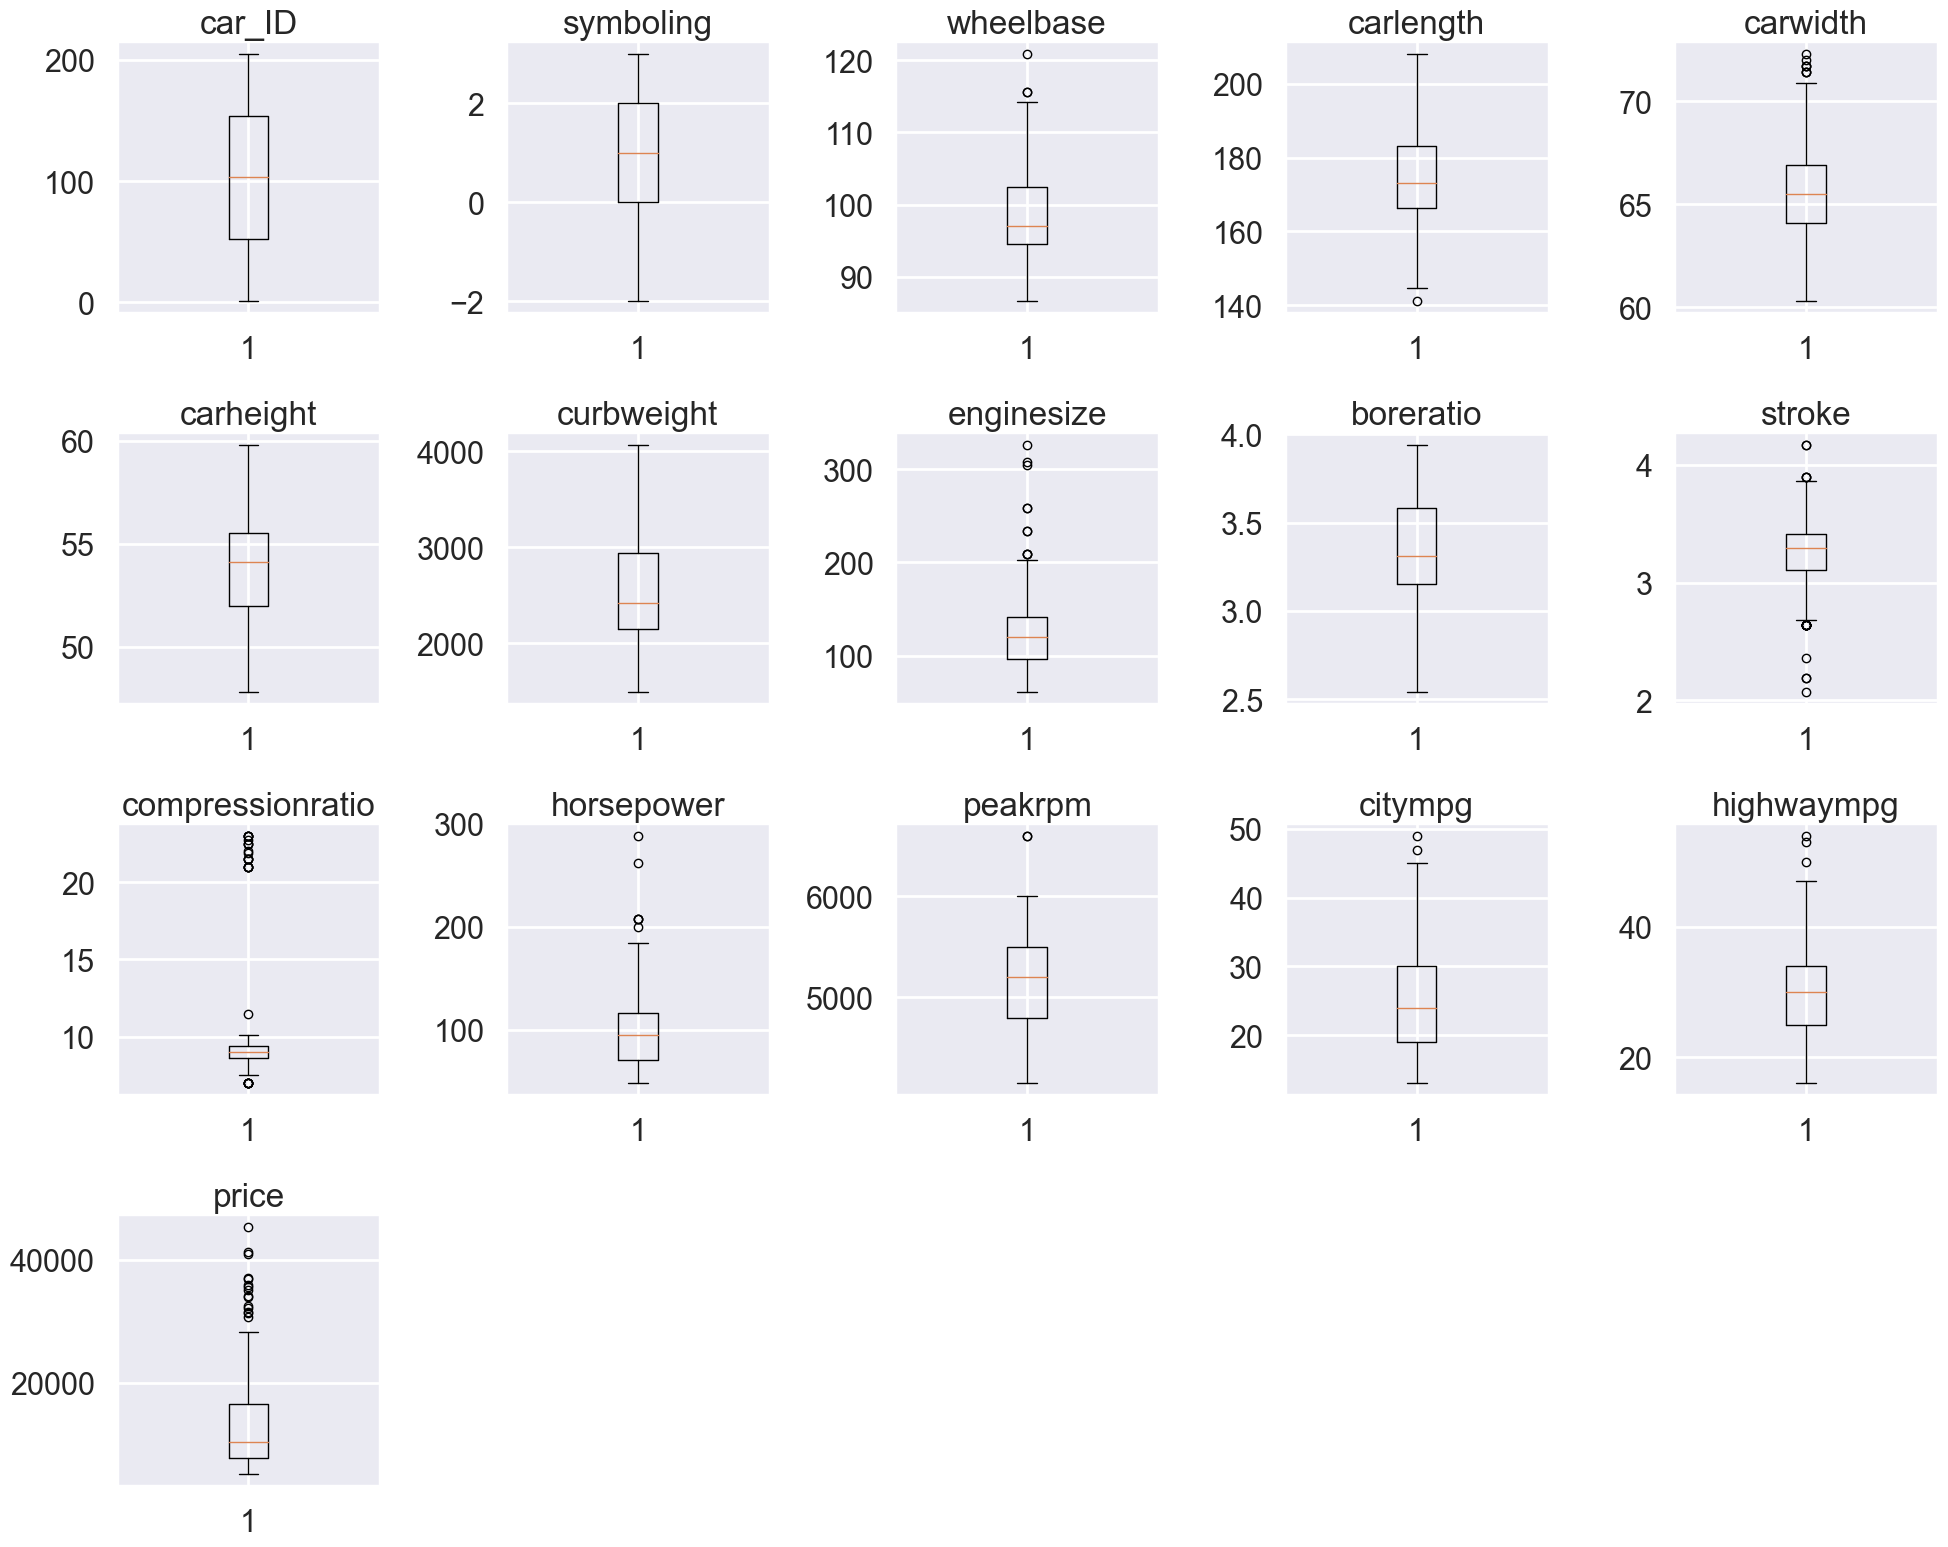

In [179]:
# Selecting numerical columns from the encoded DataFrame
numerical_cols_encoded = car_data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Create a 1x2 grid of subplots for the numerical columns
num_numerical_cols_encoded = len(numerical_cols_encoded)
num_rows = -(-num_numerical_cols_encoded // 5)  # Ceiling division to ensure enough rows

# Creating the subplot grid
fig, axs = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, num_rows * 4))

# Flatten the array of axes, in case it's not already one-dimensional
axs = axs.flatten()

# Loop over selected columns and draw a box plot for each column in a separate subplot
for i, column_name in enumerate(numerical_cols_encoded):
    ax = axs[i]  # Get the current subplot
    ax.boxplot(car_data_encoded[column_name])
    ax.set_title(column_name)

# Hide any empty subplots if the total number doesn't divide evenly into the grid
for ax in axs[num_numerical_cols_encoded:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

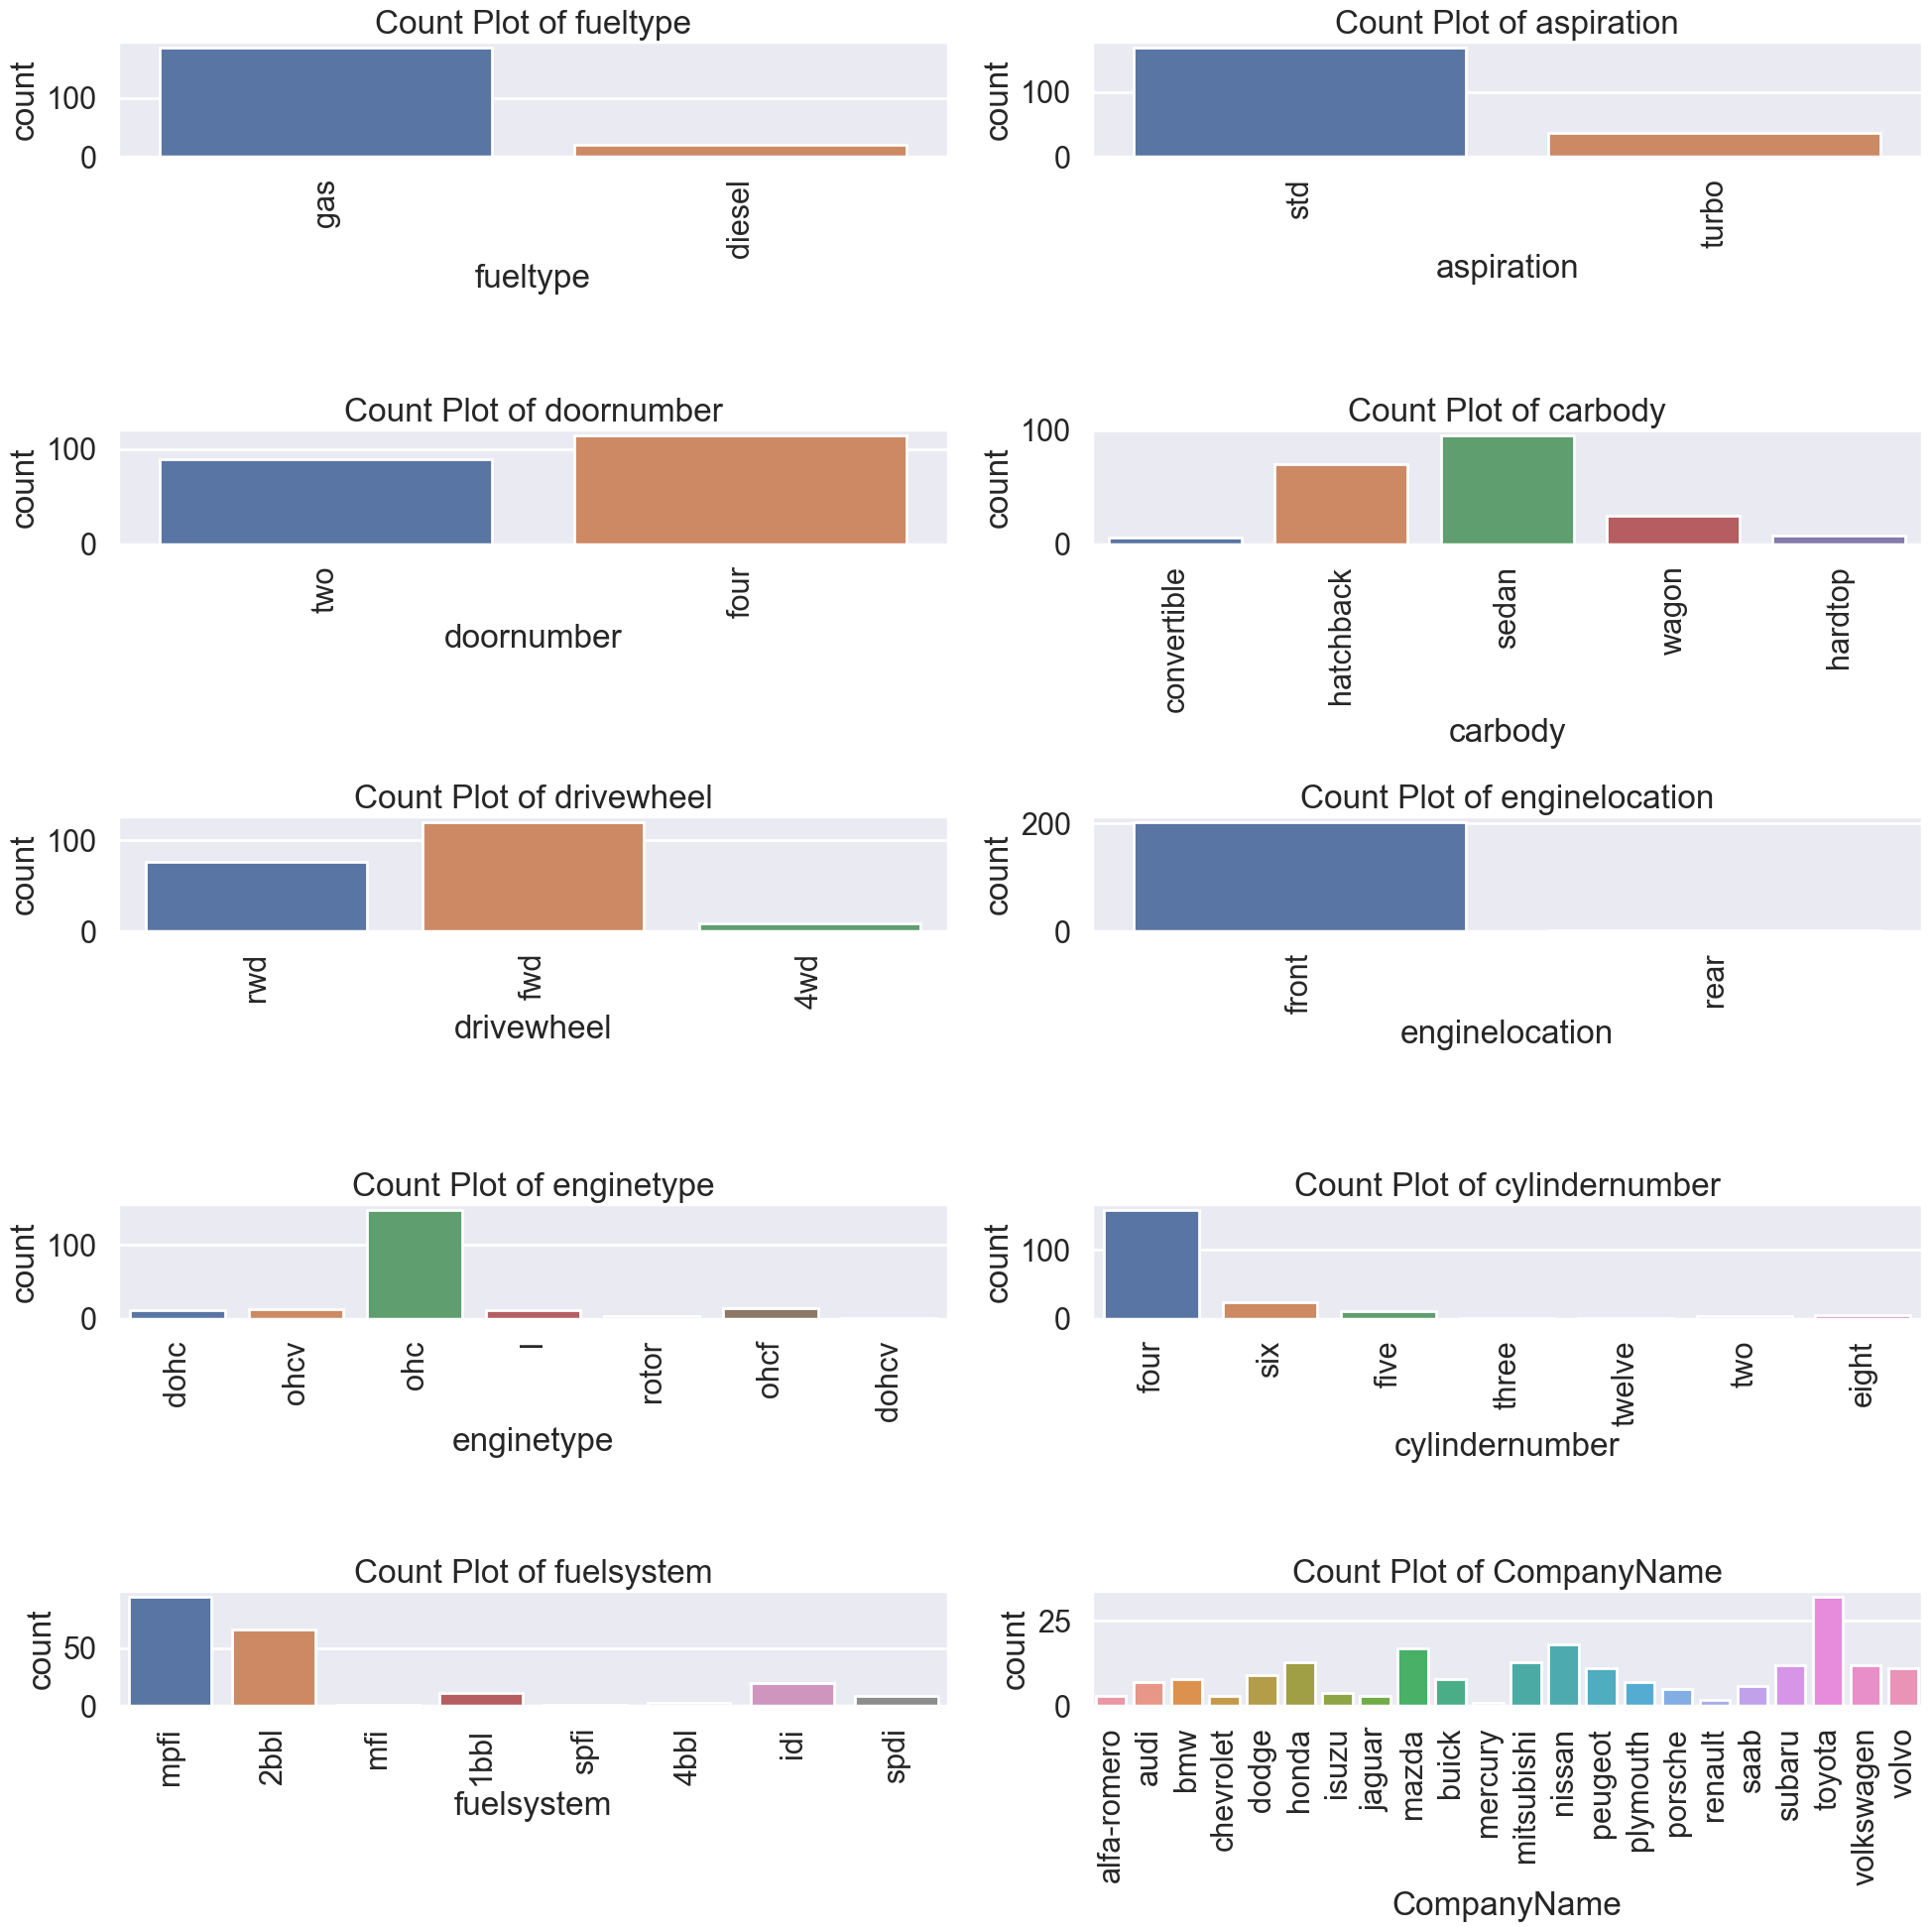

In [180]:
# Creating a larger figure for clearer plots
plt.figure(figsize=(20, 20))

# Calculate the number of rows needed for the subplots
num_rows = -(-len(categorical_columns) // 2)  # Ceiling division to ensure enough rows

# Loop through each categorical column and create a vertical count plot
for i, column_name in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 2, i)  # Create subplot
    sns.countplot(x=car_data[column_name])  # Create vertical count plot
    plt.title(f'Count Plot of {column_name}')
    plt.xticks(rotation=90)  # Rotate x labels for better readability
    plt.tight_layout()

plt.show()


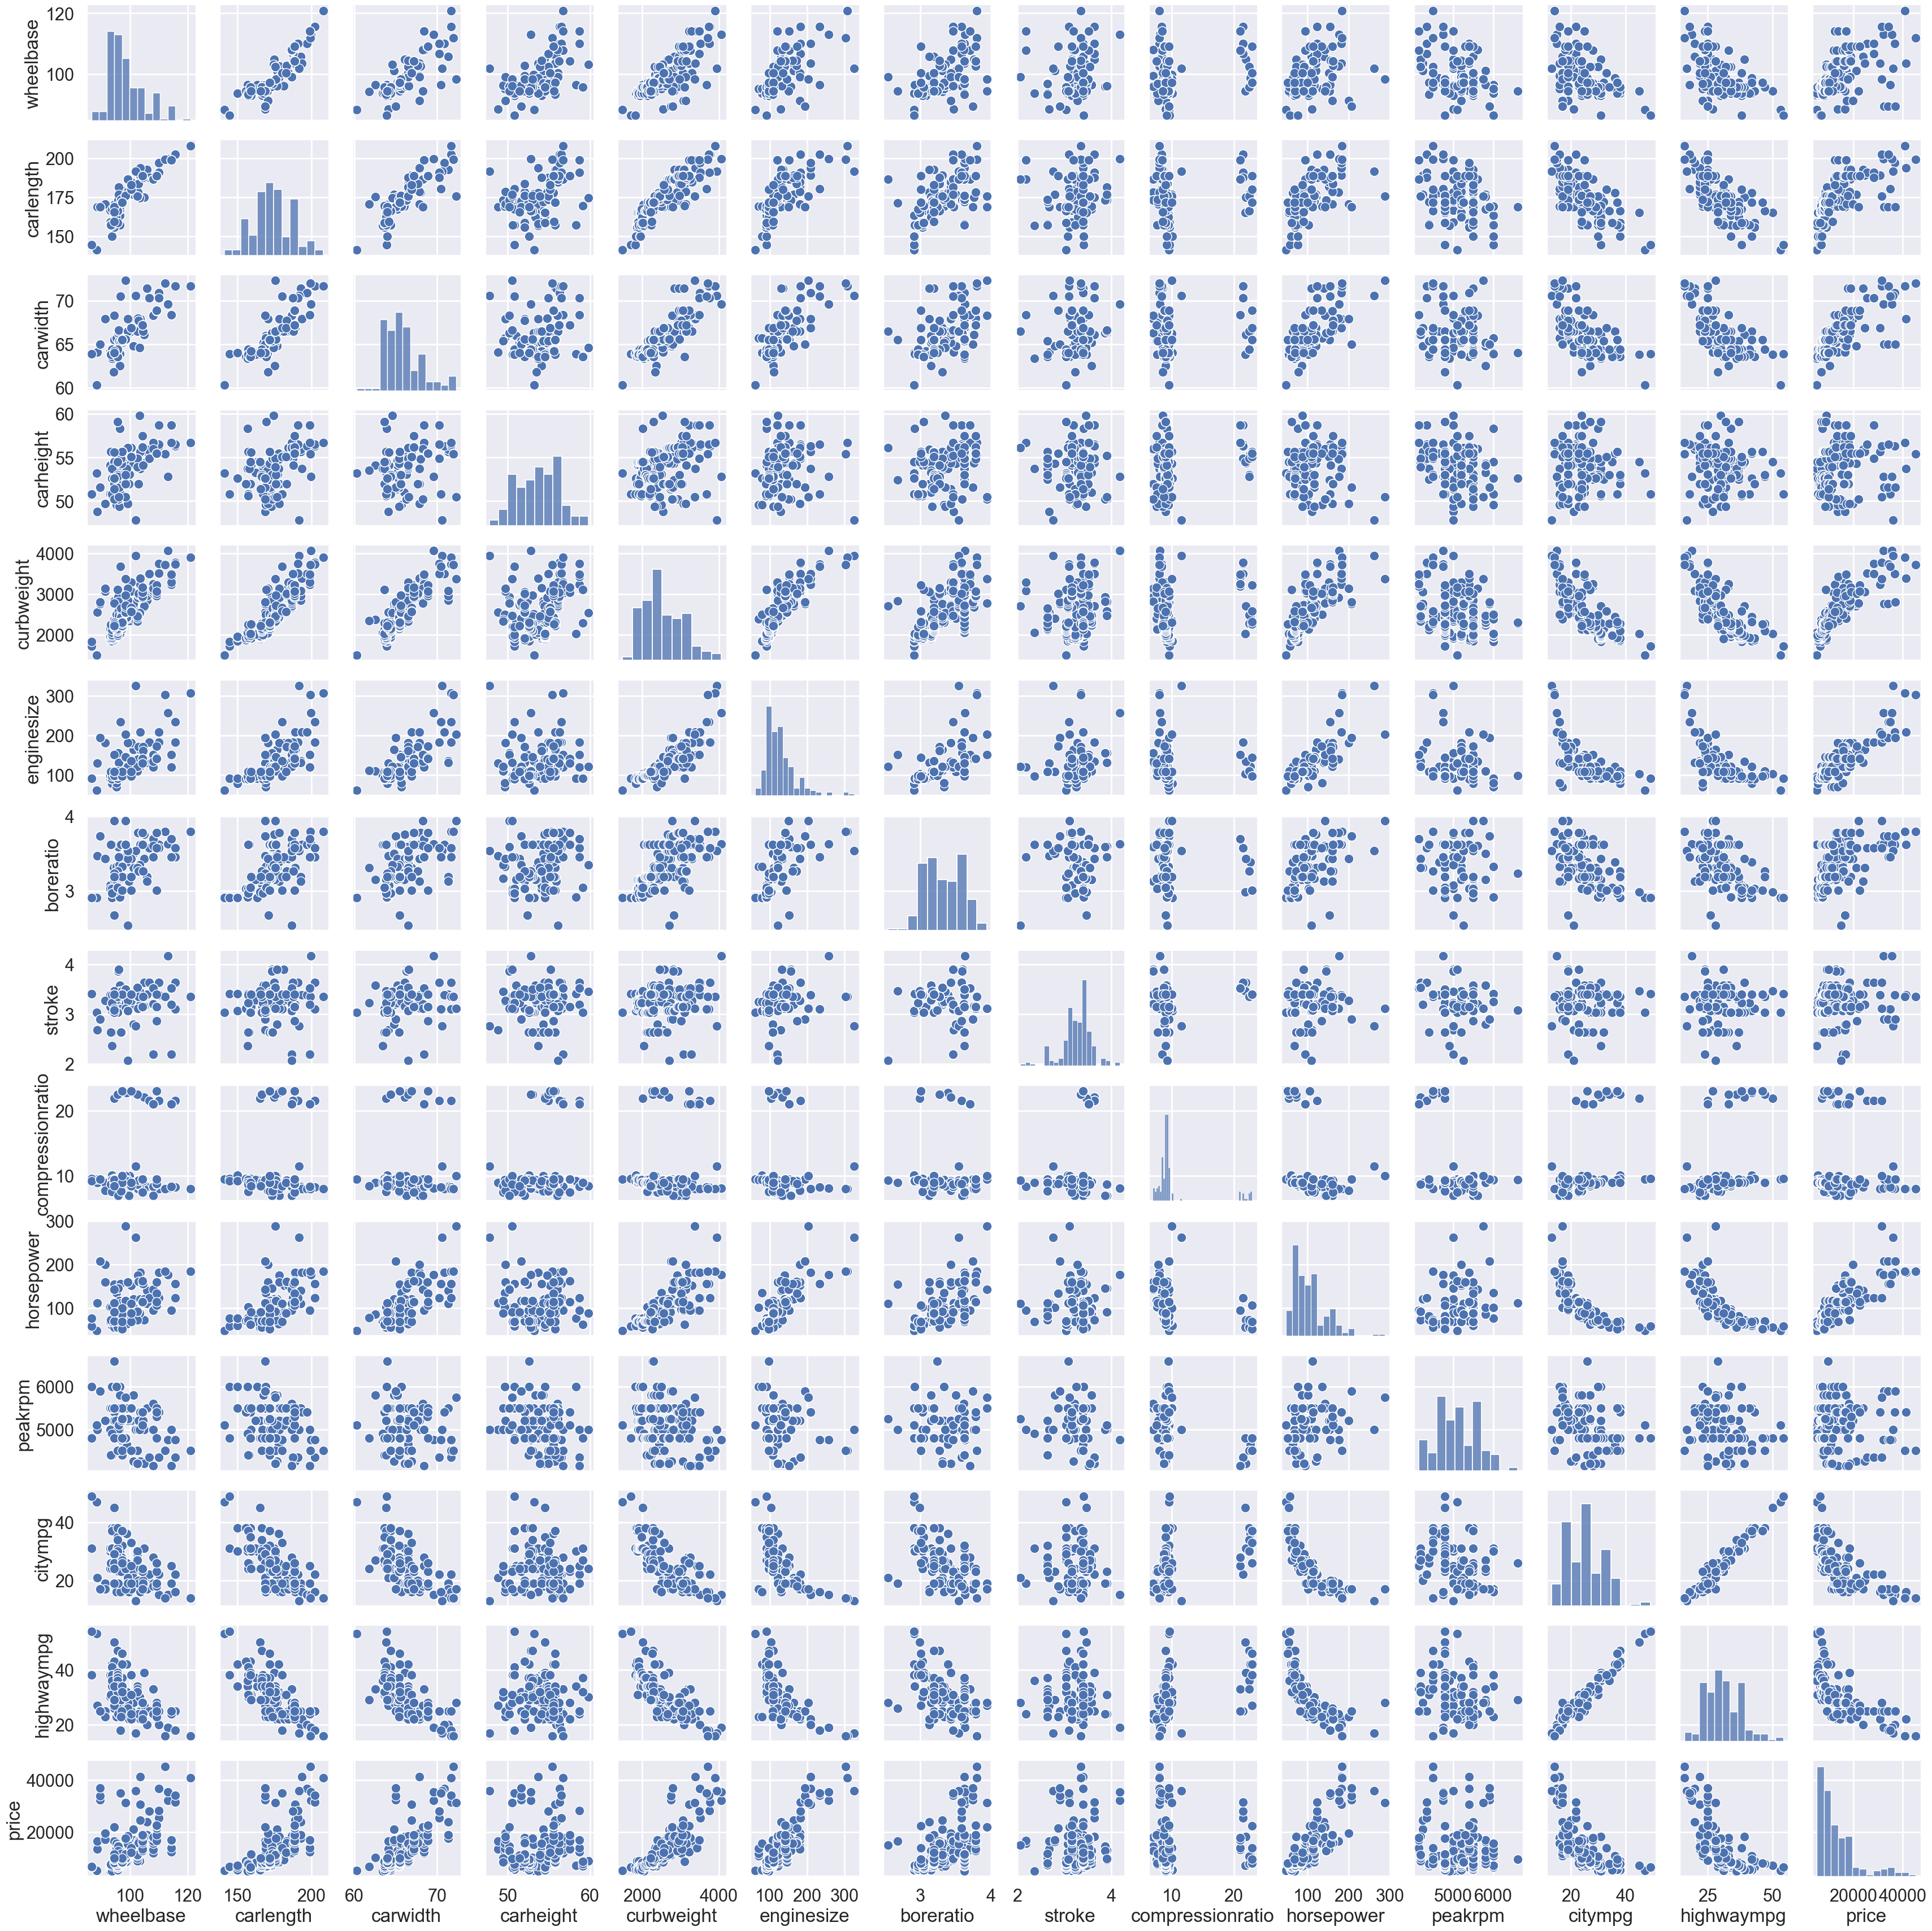

In [181]:
# Visualize the relationship between the features and the target variable using pairplot

selected_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 
                     'peakrpm', 'citympg', 'highwaympg','price']

# Add 'price' to this list as it's the target variable
#selected_features.append('price')

# Plotting
sns.set(rc={'figure.figsize':(12,8.279)})
sns.set_context("poster")
sns.pairplot(car_data[selected_features])
plt.show()


The pairplot provides a visual summary of the relationships between different variables in our dataset. Here are some observations from the plot:

Price and engine size: We can see a somewhat positive linear relationship between the price and the size of the engine. As the engine size increases, the price of the car also tends to increase.
Price and car length/width: The price also seems to have a positive correlation with the car length and width. Longer and wider cars tend to be more expensive.
Price and horsepower: There appears to be a positive relationship between the price of a car and its horsepower. Cars with more horsepower are generally more expensive.
Price and curbweight: There is a positive correlation between the price of the car and its curb weight.
Price and citympg/highwaympg: Interestingly, the price seems to have a negative correlation with both city and highway miles per gallon (mpg). This suggests that more expensive cars might have lower fuel efficiency.
These relationships suggest that a linear regression model could potentially be a good fit for this data, as several key features show linear relationships with the target variable (price). However, real-world relationships can be complex, and linear regression makes certain assumptions (like linearity, independence, and homoscedasticity) that might not hold true for all variables or contexts.

Additionally, there are many variables in this dataset, and we only looked at a subset. The relationships between the remaining variables and the price might not be as straightforward. Therefore, it's crucial to continue with a more thorough analysis and potentially consider other modeling techniques as well.

<Axes: >

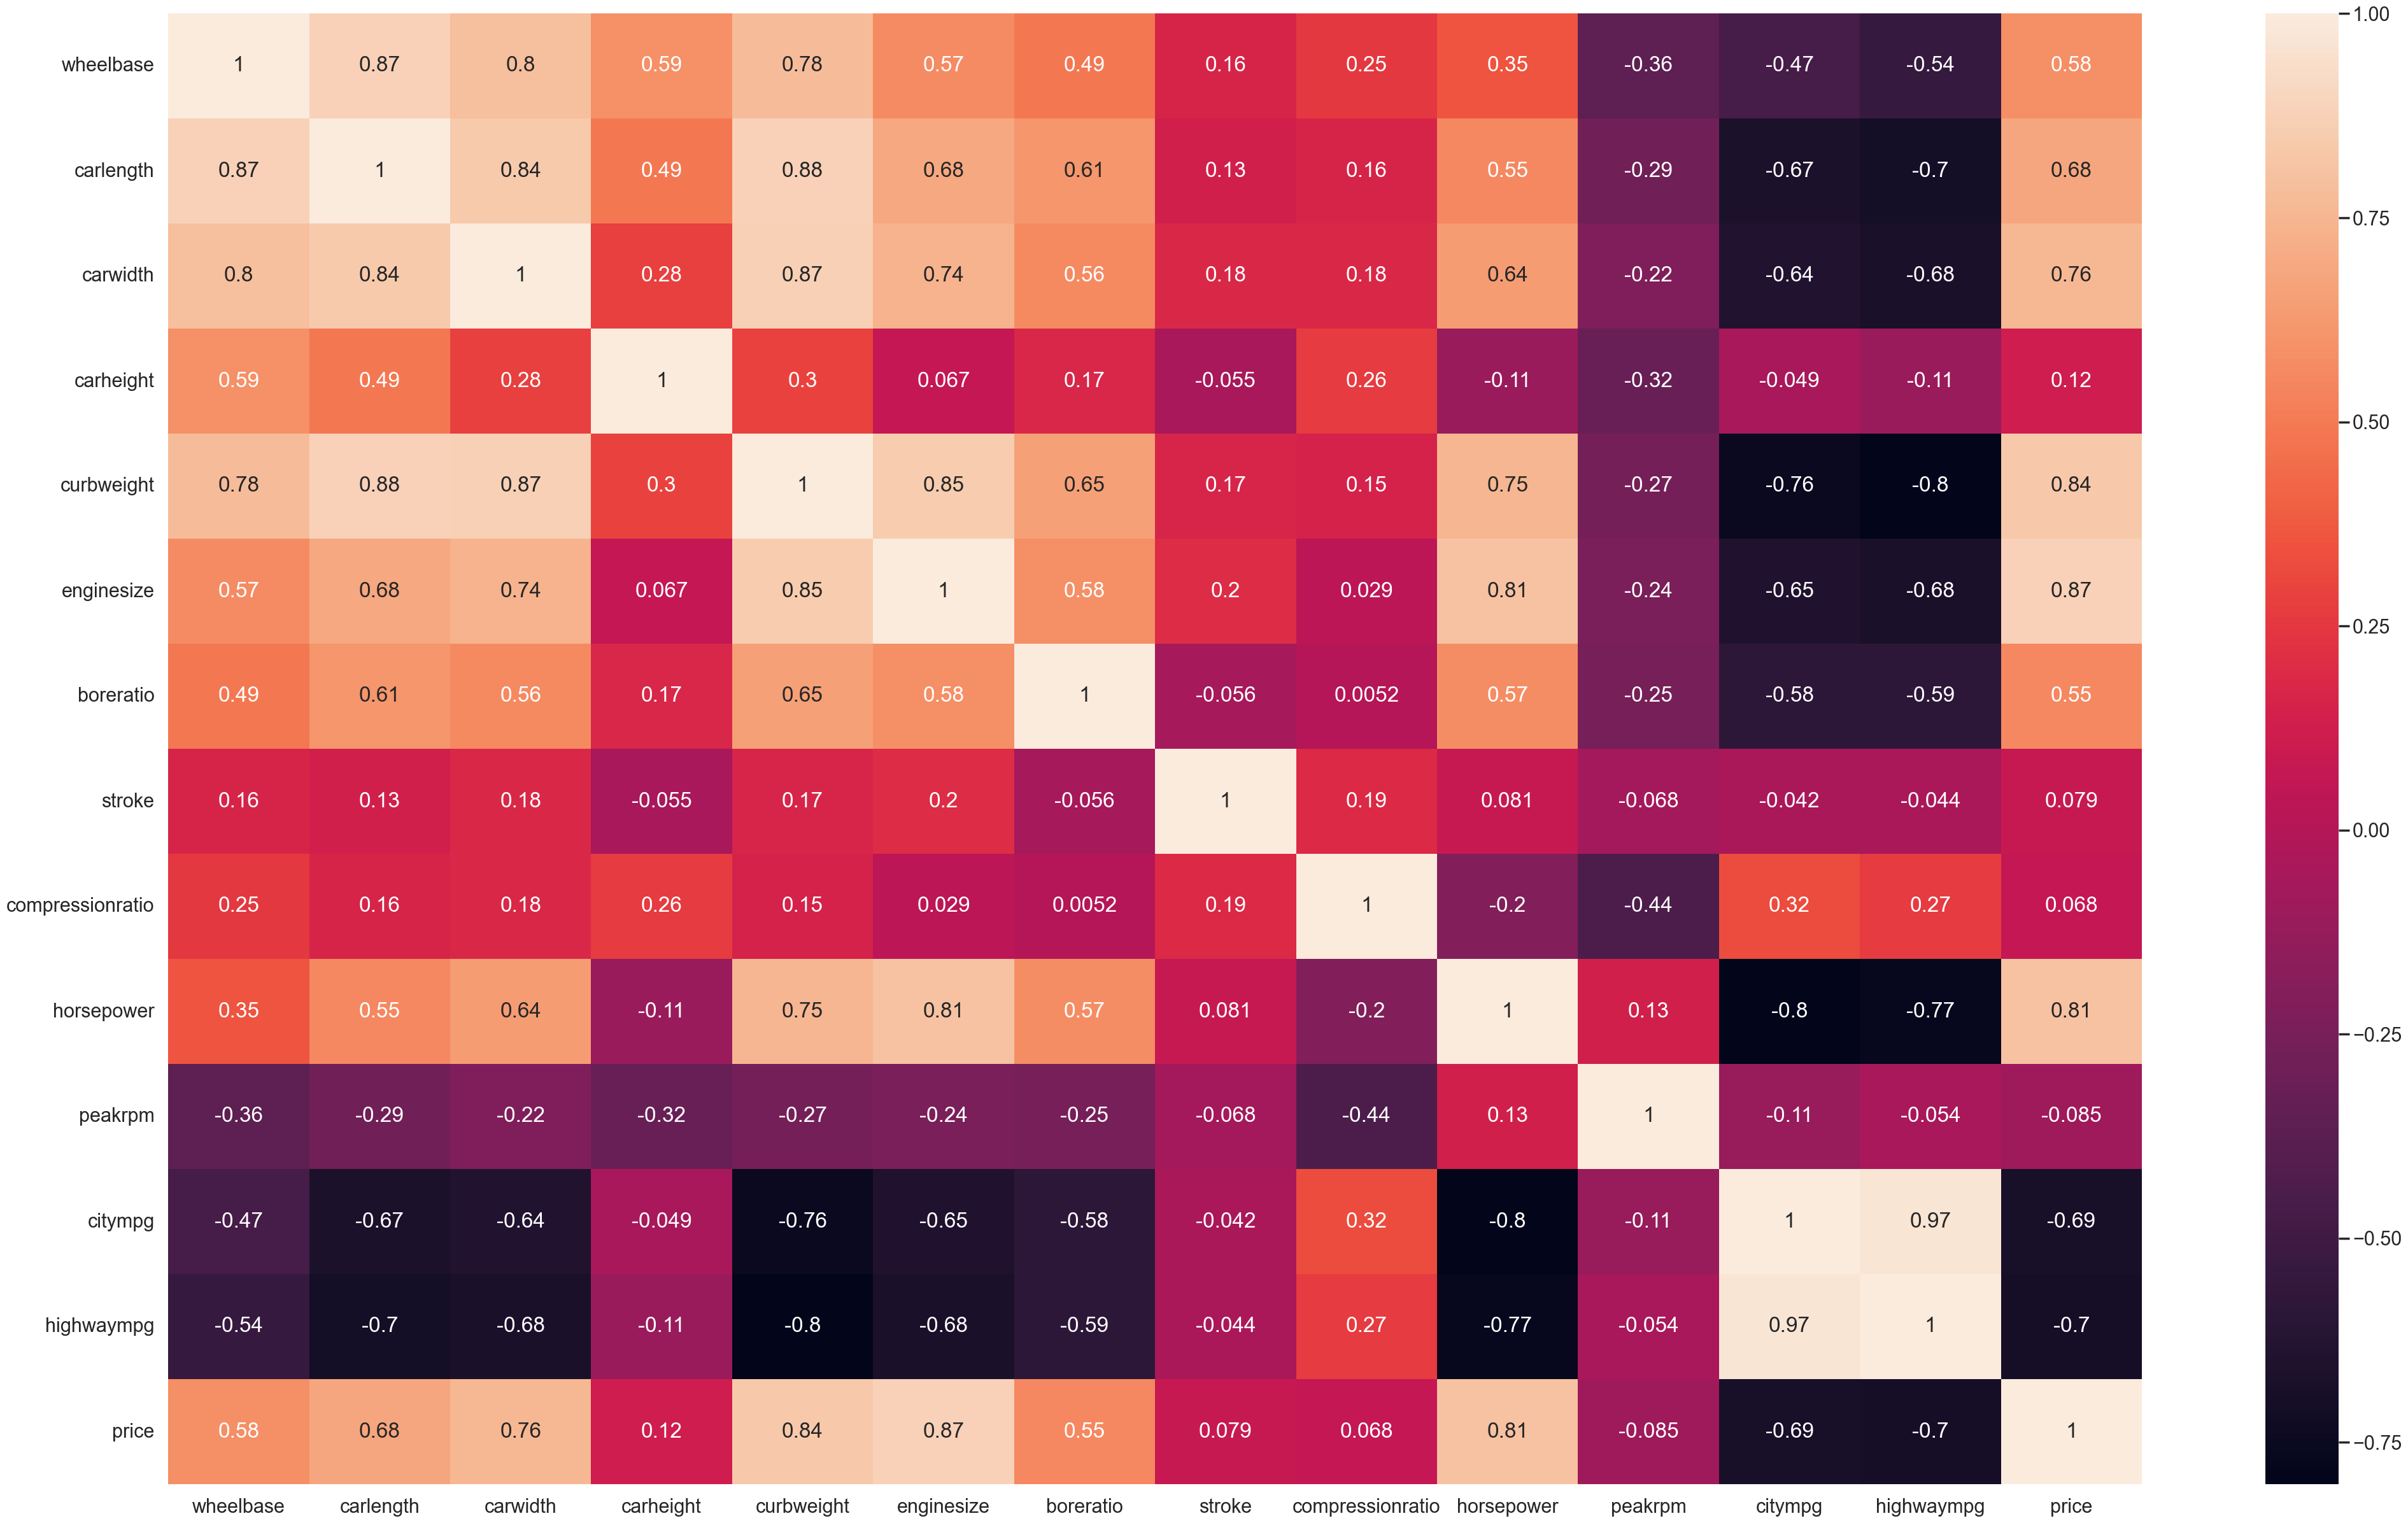

In [182]:
# Make a heatmap of the data
plt.figure(figsize=(50,30))
sns.set_context("poster")
sns.heatmap(car_data[selected_features].corr(),annot=True)

The next step is to split the data into a training set and a test set. This allows us to train our model on a portion of the data and then test it on unseen data, which gives us a better understanding of how our model will perform in the real world.

After splitting the data, we can proceed to build a model. Given that we're predicting a continuous target variable (price), this is a regression problem. We'll start with a simple linear regression model and then explore other models if necessary.



In [220]:
from sklearn.model_selection import train_test_split

# Define the features and the target
#X = car_data_encoded.drop('price', axis=1)
#y = car_data_encoded['price']

# Define the features and the target
X = car_data_encoded.drop(['price','carlength','carwidth','highwaympg'], axis=1)
y = car_data_encoded['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We've successfully split our data into training and test sets, with 80% of the data going to the training set and 20% to the test set. 
Next, let's train a Linear Regression model using our training data. After training the model, we'll test it using our test data and evaluate its performance. We'll use the root mean squared error (RMSE) as our evaluation metric.

The RMSE measures the average magnitude of the errors in a set of predictions, without considering their direction. It's the square root of the average of squared differences between prediction and actual observation. In other words, it tells us how concentrated the data is around the line of best fit.

In [223]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data with the same scaler
X_test_scaled = scaler.transform(X_test)


# Rebuilding the Linear Regression model with standardized data
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = regressor.predict(X_test_scaled)

# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse, r2

(2607.1104418258437, 0.9139007010266333)

The root mean squared error (RMSE) for our linear regression model is approximately 2607. This value represents the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line the data points are. 

In this context, an RMSE of 2607 means that on average, our prediction of the car's price is off by about $2607.

Given that car prices can range significantly, this error might be acceptable. However, it could also be beneficial to try other, potentially more complex, regression models (like Random Forest Regressor or Gradient Boosting Regressor) to see if they can provide a better fit and, thus, more accurate predictions.

In [224]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
    
# Create the models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boost_model = GradientBoostingRegressor(random_state=42)

# Train the models
linear_model.fit(X_train_scaled, y_train)
random_forest_model.fit(X_train_scaled, y_train)
gradient_boost_model.fit(X_train_scaled, y_train)

# Make predictions using the test set
linear_predictions = linear_model.predict(X_test_scaled)
random_forest_predictions = random_forest_model.predict(X_test_scaled)
gradient_boost_predictions = gradient_boost_model.predict(X_test_scaled)

# Compute the RMSE for each model
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))
random_forest_rmse = np.sqrt(mean_squared_error(y_test, random_forest_predictions))
gradient_boost_rmse = np.sqrt(mean_squared_error(y_test, gradient_boost_predictions))

# Compute the R2 score for each model
linear_r2 = r2_score(y_test, linear_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)
gradient_boost_r2 = r2_score(y_test, gradient_boost_predictions)

# Print the RMSE and R2 score for each model
linear_rmse, linear_r2, random_forest_rmse, random_forest_r2, gradient_boost_rmse, gradient_boost_r2

(2607.1104418258437,
 0.9139007010266333,
 1899.41060784497,
 0.9542997605519274,
 2187.32218796139,
 0.9393953044114448)

In [232]:
# Print the parameters of the Random Forest
print(random_forest_model.get_params())

# Print the parameters of the Gradient Boost
print(gradient_boost_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


The RMSE gives us an idea of how much error the system typically makes in its predictions, with a higher number being worse. The R2 score (coefficient of determination) represents the proportion of the variance for the dependent variable that's explained by the independent variables. Closer to 1 is better.

Based on these metrics, the Random Forest Regressor appears to perform the best on the test data, followed by the Gradient Boosting Regressor. The Linear Regression Model doesn't perform as well as the other two models.

In [242]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


#Applying 5-fold cross-validation
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boost_model = GradientBoostingRegressor(random_state=42)

# Number of folds
k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)

# Apply cross-validation
# For Linear Regression
linear_scores = cross_val_score(linear_model, X, y, scoring='neg_mean_squared_error', cv=kf)
linear_rmse_scores = np.sqrt(-linear_scores)

# For Random Forest
random_forest_scores = cross_val_score(random_forest_model, X, y, scoring='neg_mean_squared_error', cv=kf)
random_forest_rmse_scores = np.sqrt(-random_forest_scores)

# For Gradient Boosting
gradient_boost_scores = cross_val_score(gradient_boost_model, X, y, scoring='neg_mean_squared_error', cv=kf)
gradient_boost_rmse_scores = np.sqrt(-gradient_boost_scores)

# Calculate mean and standard deviation for each model
linear_rmse_mean, linear_rmse_std = linear_rmse_scores.mean(), linear_rmse_scores.std()
random_forest_rmse_mean, random_forest_rmse_std = random_forest_rmse_scores.mean(), random_forest_rmse_scores.std()
gradient_boost_rmse_mean, gradient_boost_rmse_std = gradient_boost_rmse_scores.mean(), gradient_boost_rmse_scores.std()

# Print the results
print(f"Linear Regression RMSE: {linear_rmse_mean} ± {linear_rmse_std}")
print(f"Random Forest RMSE: {random_forest_rmse_mean} ± {random_forest_rmse_std}")
print(f"Gradient Boost RMSE: {gradient_boost_rmse_mean} ± {gradient_boost_rmse_std}")


Linear Regression RMSE: 2735.1739550430784 ± 357.76844727098984
Random Forest RMSE: 2062.12631150325 ± 175.6811881889979
Gradient Boost RMSE: 2124.650797596507 ± 174.29639617322934


In [243]:
#Apply Hyperparameter Tuning on ridge and lasso

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso

ridge_params = {'alpha': [0.1, 1, 10, 100, 200, 300, 400, 500]}  # or any range of numbers based on your understanding
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # adjust this based on what makes sense for your problem

ridge_grid_search = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
lasso_grid_search = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='r2')

# For Ridge Regression
ridge_grid_search.fit(X_train_scaled, y_train)

# For Lasso Regression
lasso_grid_search.fit(X_train_scaled, y_train)

# Best parameters and score for Ridge
print("Best parameters for Ridge: ", ridge_grid_search.best_params_)
print("Best R² score for Ridge: ", ridge_grid_search.best_score_)

# Best parameters and score for Lasso
print("Best parameters for Lasso: ", lasso_grid_search.best_params_)
print("Best R² score for Lasso: ", lasso_grid_search.best_score_)


# Making predictions with the best Ridge model
best_ridge = ridge_grid_search.best_estimator_
ridge_predictions = best_ridge.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))

# Making predictions with the best Lasso model
best_lasso = lasso_grid_search.best_estimator_
lasso_predictions = best_lasso.predict(X_test_scaled)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))

# Print out the results
print(f"Optimized Ridge RMSE: {ridge_rmse}")
print(f"Optimized Lasso RMSE: {lasso_rmse}")




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.043e+07, tolerance: 8.320e+05
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.144e+08, tolerance: 8.247e+05
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Best parameters for Ridge:  {'alpha': 10}
Best R² score for Ridge:  0.9193939576640258
Best parameters for Lasso:  {'alpha': 100}
Best R² score for Lasso:  0.9084695330636012
Optimized Ridge RMSE: 2799.799997319725
Optimized Lasso RMSE: 2835.6736343084617


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.447e+07, tolerance: 7.461e+05
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.061e+07, tolerance: 6.692e+05
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

In [244]:
#Apply hyperparameter on random_forest and gradient_boost algorithms

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

rf_params = {
    'n_estimators': [50, 200, 300],  # number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # number of features to consider at every split
    'max_depth': [5, 20, 30],  # maximum number of levels in tree
    'min_samples_split': [2, 5, 10]  # minimum number of samples required to split a node
    # Add more parameters here if you like
}

gb_params = {
    'n_estimators': [50, 100, 200],  # number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # learning rate
    'max_depth': [3, 4, 5],  # maximum depth of the individual regression estimators
    # Add more parameters here if you like
}

# Initialize GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(RandomForestRegressor(), rf_params, cv=5, scoring='r2')

# Initialize GridSearchCV for Gradient Boosting
gb_grid_search = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5, scoring='r2')

# Fit the grid search for Random Forest
rf_grid_search.fit(X_train_scaled, y_train)

# Fit the grid search for Gradient Boosting
gb_grid_search.fit(X_train_scaled, y_train)

# Best parameters and score for Random Forest
print("Best parameters for Random Forest: ", rf_grid_search.best_params_)
print("Best R² score for Random Forest: ", rf_grid_search.best_score_)


# Best parameters and score for Gradient Boosting
print("Best parameters for Gradient Boosting: ", gb_grid_search.best_params_)
print("Best R² score for Gradient Boosting: ", gb_grid_search.best_score_)


# Predictions with the best Random Forest model
best_rf = rf_grid_search.best_estimator_
rf_predictions = best_rf.predict(X_test_scaled)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

# Predictions with the best Gradient Boosting model
best_gb = gb_grid_search.best_estimator_
gb_predictions = best_gb.predict(X_test_scaled)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))

# Print out the results
print(f"Optimized Random Forest RMSE: {rf_rmse}")
print(f"Optimized Gradient Boosting RMSE: {gb_rmse}")



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

Best parameters for Random Forest:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}
Best R² score for Random Forest:  0.9011511971252937
Best parameters for Gradient Boosting:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best R² score for Gradient Boosting:  0.876317737181218
Optimized Random Forest RMSE: 2202.1514872469356
Optimized Gradient Boosting RMSE: 2123.188708547102


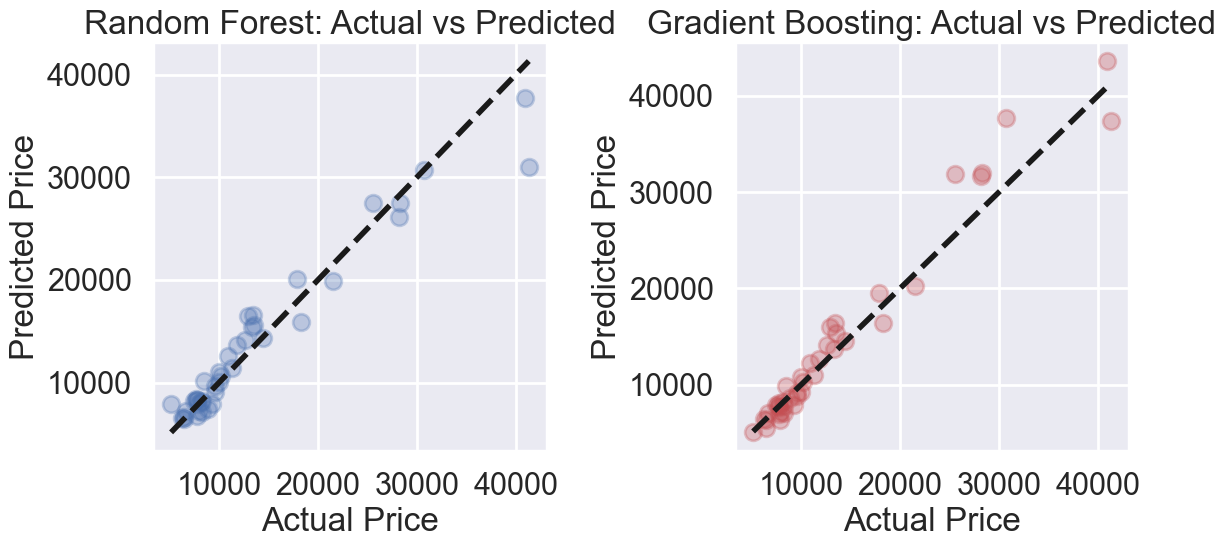

In [245]:

# Assuming best_rf and best_gb are your best models from Random Forest and Gradient Boosting respectively
rf_predictions = best_rf.predict(X_test_scaled)
gb_predictions = best_gb.predict(X_test_scaled)

import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Scatter plot for Random Forest predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # A reference line
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Scatter plot for Gradient Boosting predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, gb_predictions, alpha=0.3, color='r')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # A reference line
plt.title('Gradient Boosting: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Show the plot
plt.tight_layout()
plt.show()
